In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Section 1: Load the Dataset ---
# Explanation: This section loads the dataset and prepares it for analysis.

file_path = 'Metadata_Release_Anon.csv'

try:
    # Attempt to load the dataset
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    # Handle the case where the file does not exist
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    exit()
except pd.errors.EmptyDataError:
    # Handle the case where the file is empty
    print(f"Error: The file '{file_path}' is empty. Please provide a valid dataset.")
    exit()
except Exception as e:
    # Catch any other exceptions
    print(f"An unexpected error occurred while loading the dataset: {e}")
    exit()

# Display the first few rows of the dataset to verify it loaded correctly
print(data.head())

# Check for missing values in the dataset and warn the user if any are found
if data.isnull().values.any():
    print("Warning: The dataset contains missing values. Consider handling them before analysis.")
else:
    print("No missing values detected in the dataset.")


Dataset loaded successfully.
   ID Sex Binned_Onset_Age   FUS  fqFUS  FBTCS  fqFBTCS     SE Op_Side  \
0   1   M           1 to 2  True    2.0   True     3.00  False       R   
1   2   F         15 to 19  True   42.0   True     0.33  False       R   
2   3   M         15 to 19  True    1.5   True     0.00  False       L   
3   4   M         11 to 14  True   10.0  False      NaN  False       R   
4   5   F           5 to 7  True    4.0   True     0.00  False       L   

  Op_Type Pathology                       OP MEMO  Number_ASMs  \
0    T Lx     OTHER  oligodendroglial hyperplasia            3   
1    T Lx        HS                        type 1            1   
2  T Lesx       DNT                           NaN            2   
3    T Lx     OTHER                           EFG            2   
4    T Lx        HS     type 1; (& FCD type IIIA)            2   

  Binned_Age_at_Scan Binned_Age_at_Surgery  ILAE_Year1  ILAE_Year2  \
0           20 to 24              20 to 24         4.0     

  Binned_Onset_Age  Time_to_Success
0           1 to 2                5
1         15 to 19                1
2         15 to 19                1
3         11 to 14                3
4           5 to 7                1


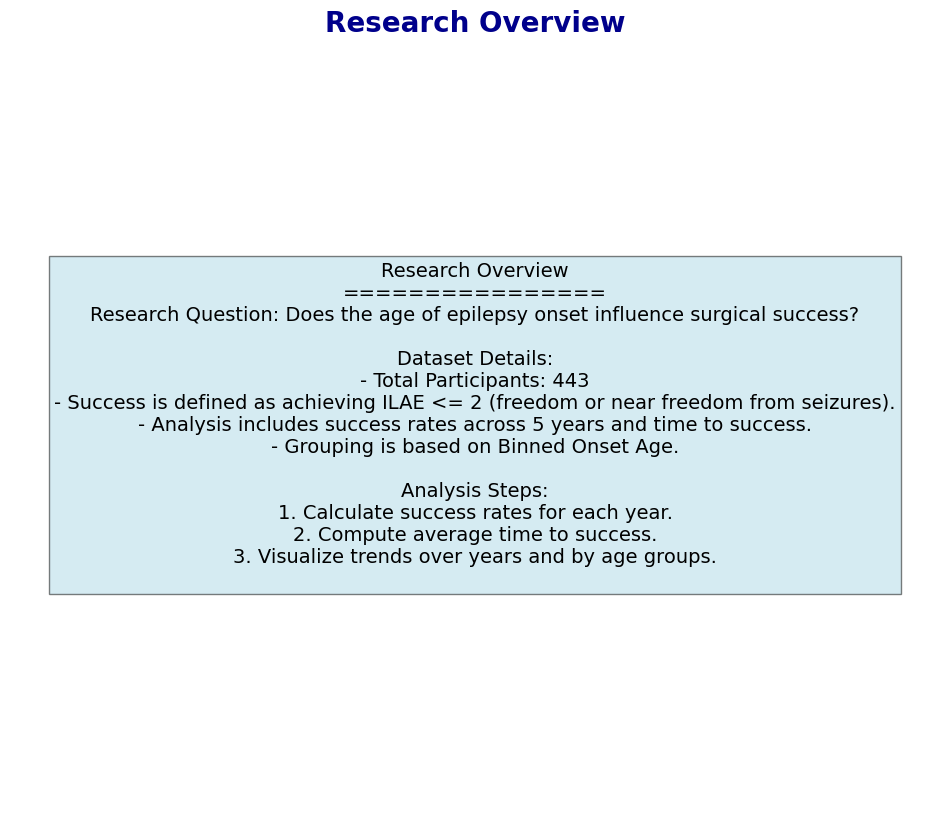

In [17]:
# --- Section 2: Preprocessing ---
# Explanation: Define success criteria and compute the time to success for each patient.
# This prepares the data for further statistical and visualization analysis.

def define_success(ilae_score):
    try:
        # Ensure the score is a valid numeric value
        if np.isnan(ilae_score):
            return np.nan
        return 1 if ilae_score <= 2 else 0
    except Exception as e:
        print(f"Error in define_success: {e}")
        return np.nan

# Apply success definition for each year
for year in range(1, 6):
    col_name = f"ILAE_Year{year}"
    success_col = f"Success_Year{year}"
    if col_name in data.columns:
        data[success_col] = data[col_name].apply(define_success)
    else:
        print(f"Warning: Column '{col_name}' not found in dataset. Skipping...")
        data[success_col] = np.nan

# Function to compute the time to success
def time_to_success(row):
    try:
        for year in range(1, 6):
            if row.get(f"Success_Year{year}", np.nan) == 1:
                return year
        return 5  # Default to 5 years if no success
    except Exception as e:
        print(f"Error in time_to_success: {e}")
        return np.nan

# Apply time to success calculation
try:
    data['Time_to_Success'] = data.apply(time_to_success, axis=1)
except Exception as e:
    print(f"Error while calculating Time_to_Success: {e}")

# Display first few rows to verify
if 'Binned_Onset_Age' in data.columns and 'Time_to_Success' in data.columns:
    print(data[['Binned_Onset_Age', 'Time_to_Success']].head())
else:
    print("Error: Required columns are missing for preview.")

# --- Explanation Screen ---
# Display research question, dataset details, and analysis overview
try:
    plt.figure(figsize=(12, 10))
    definition = (
        "Research Overview\n"
        "================\n"
        "Research Question: Does the age of epilepsy onset influence surgical success?\n\n"
        "Dataset Details:\n"
        f"- Total Participants: {len(data)}\n"
        "- Success is defined as achieving ILAE <= 2 (freedom or near freedom from seizures).\n"
        "- Analysis includes success rates across 5 years and time to success.\n"
        "- Grouping is based on Binned Onset Age.\n\n"
        "Analysis Steps:\n"
        "1. Calculate success rates for each year.\n"
        "2. Compute average time to success.\n"
        "3. Visualize trends over years and by age groups.\n"
    )
    plt.text(0.5, 0.5, definition, fontsize=14, ha='center', va='center', wrap=True, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.axis('off')
    plt.title('Research Overview', fontsize=20, fontweight='bold', color='darkblue')
    plt.show()
except Exception as e:
    print(f"Error while displaying the explanation screen: {e}")


Average Time to Success by Age Group:
Age_Group
1 to 2         1.653846
11 to 14       2.333333
15 to 19       2.444444
20 to 24       1.814815
25 to 29       2.076923
3 to 4         1.440000
30 to 34       2.520000
35 to 39       2.615385
5 to 7         1.936508
8 to 10        1.886364
Less than 1    2.230769
Over 40        2.538462
Name: Time_to_Success, dtype: float64


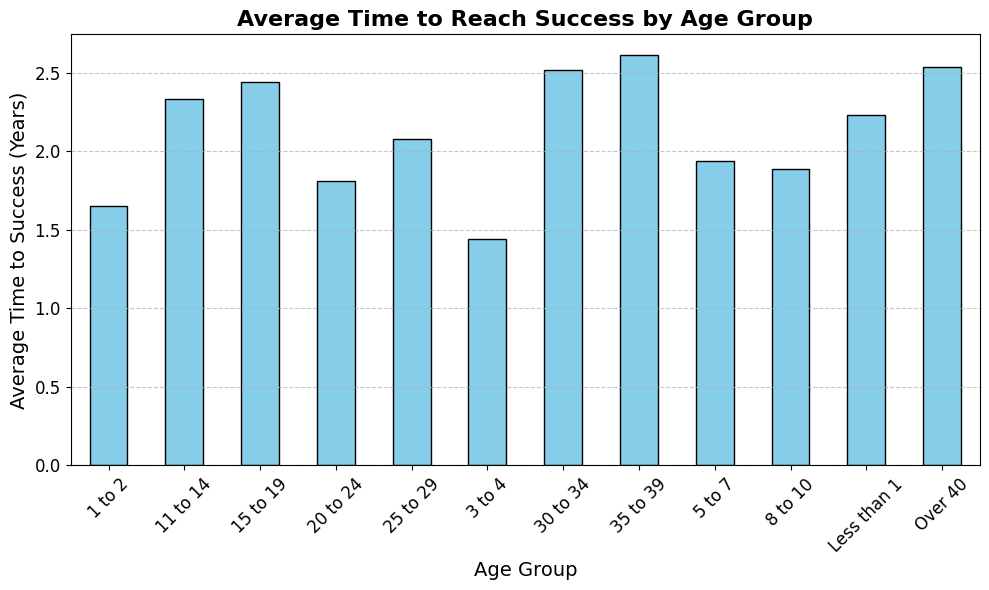

Saved 'avg_time_to_success.csv' successfully.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# This code calculates "Time_to_Success" for each row (if not already present),
# groups the data by multiple age categories, computes the mean time for each
# age group, and finally displays and saves the results.
# -----------------------------------------------------------------------------

# Example assumption: 'data' is already a pandas DataFrame in memory
# For instance:
# data = pd.read_csv('my_data.csv')

# Check and create 'Time_to_Success' column if it doesn't exist
if 'Time_to_Success' not in data.columns:
    if 'Year_of_Surgery' in data.columns and 'Year_of_Onset' in data.columns:
        data['Time_to_Success'] = data['Year_of_Surgery'] - data['Year_of_Onset']
    else:
        print("Cannot calculate 'Time_to_Success' - missing 'Year_of_Surgery' or 'Year_of_Onset'.")
        exit()

# If Time_to_Success is entirely NaN, there's no point in proceeding
if data['Time_to_Success'].isnull().all():
    print("All values in 'Time_to_Success' are missing. Exiting.")
    exit()

# Create age groups
if 'Age' in data.columns:
    bins = [0, 2, 5, 10, 15, 20, 25, 30, 40, 50, 60, 120]
    labels = [
        "0-2", "2-5", "5-10", "10-15", "15-20",
        "20-25", "25-30", "30-40", "40-50", "50-60", "60+"
    ]
    data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
elif 'Binned_Onset_Age' in data.columns:
    data['Age_Group'] = data['Binned_Onset_Age']
else:
    print("No suitable age column found ('Age' or 'Binned_Onset_Age'). Exiting.")
    exit()

# Group by age group and compute mean Time_to_Success
avg_time_to_success = data.groupby('Age_Group')['Time_to_Success'].mean()

if avg_time_to_success.empty:
    print("No data available to compute average Time_to_Success by age group.")
    exit()

print("Average Time to Success by Age Group:")
print(avg_time_to_success)

# Plot a bar chart
avg_time_to_success.plot(
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black'
)
plt.title('Average Time to Reach Success by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Time to Success (Years)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save results
try:
    avg_time_to_success.to_csv('avg_time_to_success.csv', index=True)
    print("Saved 'avg_time_to_success.csv' successfully.")
except Exception as e:
    print(f"Error saving results: {e}")

# -----------------------------------------------------------------------------
# End of code: It has computed and plotted the average time to success for each
# age group, and saved the results to a CSV file.
# -----------------------------------------------------------------------------


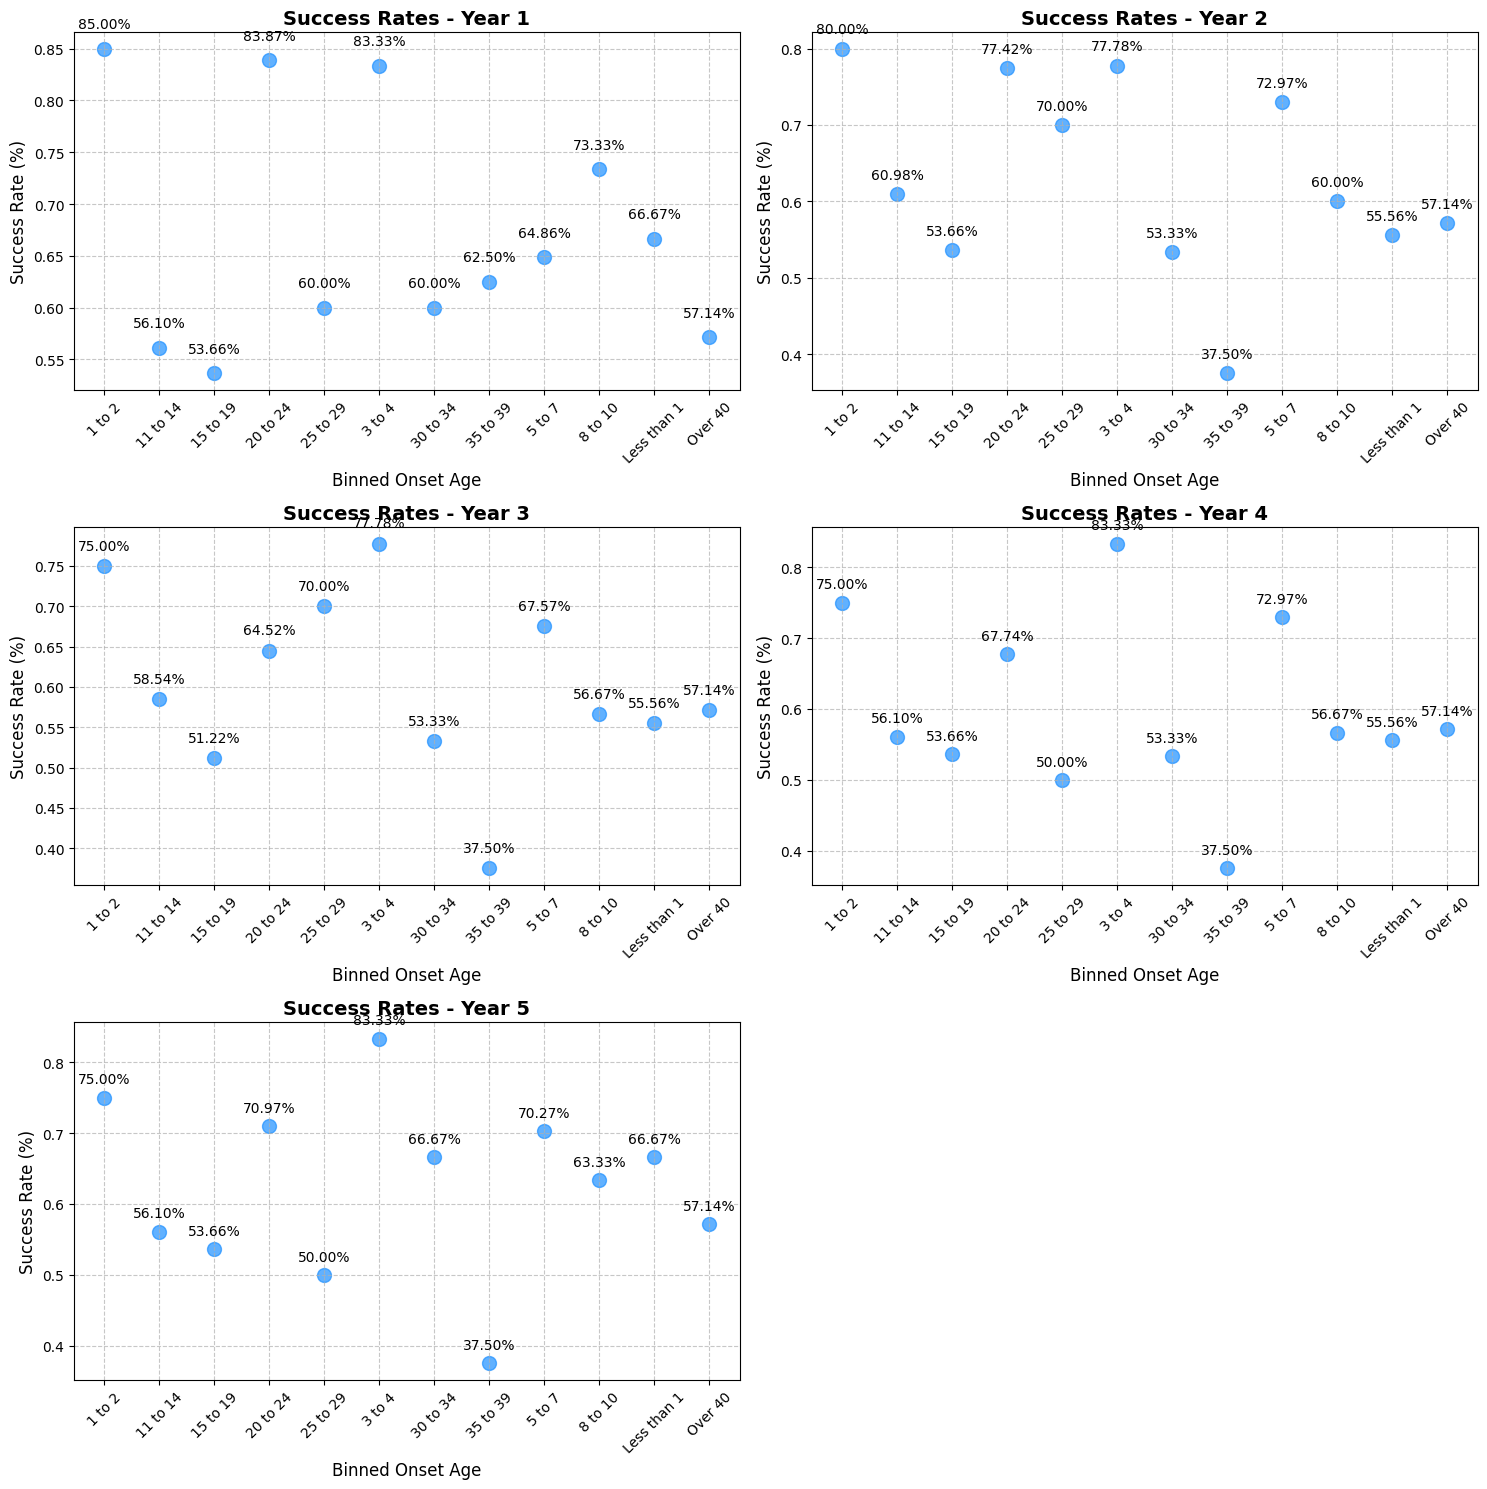

Success rates saved to 'success_rates_by_year.csv'.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Section: Success Rates Analysis ---

try:
    # --- Filter data to include only rows with complete data ---
    required_columns = [f"ILAE_Year{year}" for year in range(1, 6)] + ['Binned_Onset_Age']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' is missing from the dataset.")

    # Filter rows with missing data in required columns
    data_filtered = data.dropna(subset=required_columns).copy()

    # --- Group data by Binned_Onset_Age and calculate success rates ---
    grouped = data_filtered.groupby('Binned_Onset_Age')
    success_rates = {}

    for year in range(1, 6):
        success_rates[f"Year{year}"] = grouped[f"Success_Year{year}"].mean()

    success_rates_df = pd.DataFrame(success_rates).sort_index()

    # --- Check for missing or zero data ---
    if success_rates_df.isnull().values.any():
        print("Warning: Some groups have missing data.")
    if (success_rates_df == 0).all().any():
        print("Warning: Some groups have zero success rates for all years.")

    # --- Plot success rates as scatter plots ---
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    axes = axes.flatten()

    for i, year in enumerate(range(1, 6)):
        ax = axes[i]
        try:
            ax.scatter(success_rates_df.index, success_rates_df[f"Year{year}"], color='dodgerblue', s=100, alpha=0.7)
            for idx, rate in enumerate(success_rates_df[f"Year{year}"].values):
                if not np.isnan(rate):
                    ax.text(idx, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=10, color='black')
            ax.set_title(f'Success Rates - Year {year}', fontsize=14, fontweight='bold')
            ax.set_xlabel('Binned Onset Age', fontsize=12)
            ax.set_ylabel('Success Rate (%)', fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.set_xticks(range(len(grouped)))
            ax.set_xticklabels(success_rates_df.index, rotation=45, fontsize=10)
            ax.tick_params(axis='both', labelsize=10)
        except Exception as e:
            print(f"Error plotting Year {year}: {e}")

    # Hide any unused subplots
    for j in range(len(range(1, 6)), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

except ValueError as ve:
    print(f"ValueError: {ve}")
except KeyError as ke:
    print(f"KeyError: {ke}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# --- Save Results ---
try:
    # Ensure success_rates_df is not empty
    if success_rates_df.empty:
        raise ValueError("The 'success_rates_df' DataFrame is empty and cannot be saved.")

    # Save success rates to CSV
    success_rates_df.to_csv('success_rates_by_year.csv', index=True)
    print("Success rates saved to 'success_rates_by_year.csv'.")

except ValueError as ve:
    print(f"ValueError while saving results: {ve}")
except Exception as e:
    print(f"An unexpected error occurred while saving results: {e}")


C:\Users\ohadp\AppData\Local\Temp\ipykernel_32640\3992707020.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('Binned_Onset_Age', dropna=False)


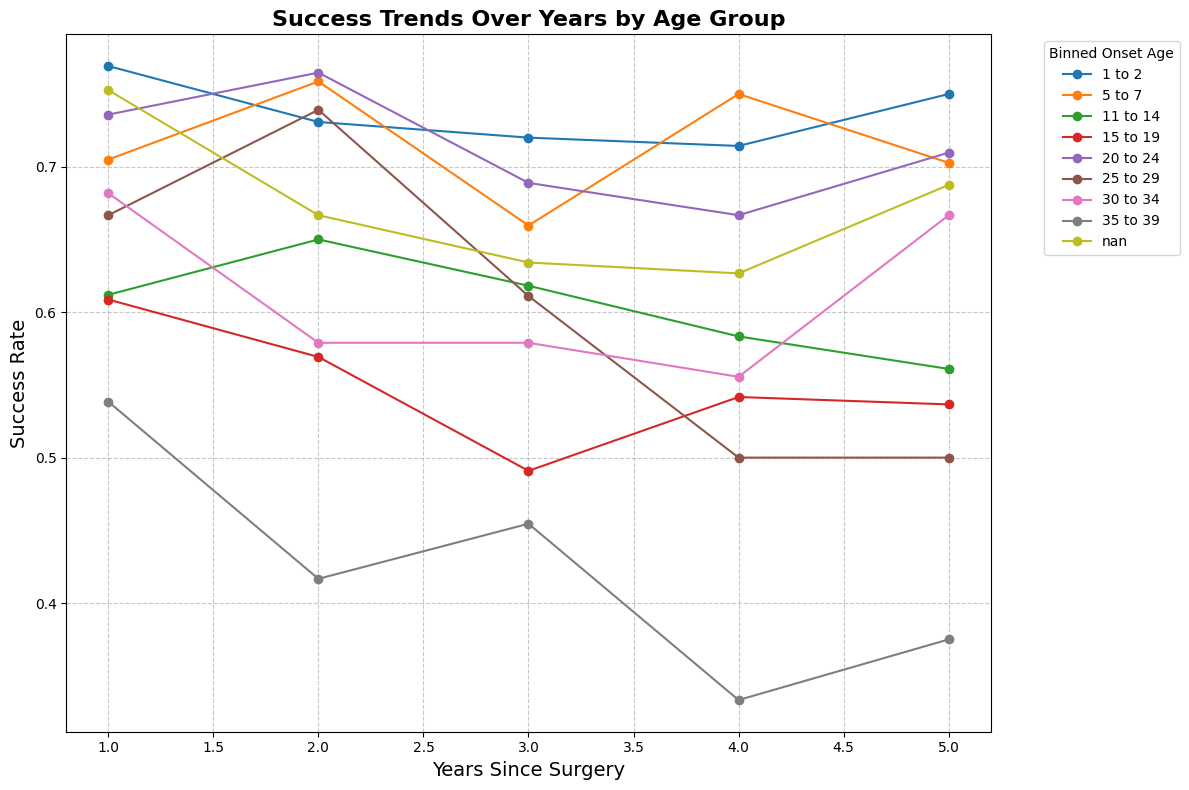

In [20]:
# --- Section 3: Trends in Success Over Years for Each Age Group ---

try:
    # Define the age order and ensure proper ordering in the dataset
    age_order = ['< 1', '1 to 2', '3-4', '5 to 7', '8-10', '11 to 14', '15 to 19', '20 to 24', 
                 '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '> 50']
    if 'Binned_Onset_Age' not in data.columns:
        raise ValueError("Column 'Binned_Onset_Age' is missing from the dataset.")
    data['Binned_Onset_Age'] = pd.Categorical(data['Binned_Onset_Age'], categories=age_order, ordered=True)

    # Group data by Binned_Onset_Age and calculate success rates
    grouped = data.groupby('Binned_Onset_Age', dropna=False)
    success_rates = {}
    for year in range(1, 6):
        if f"Success_Year{year}" not in data.columns:
            raise ValueError(f"Column 'Success_Year{year}' is missing from the dataset.")
        success_rates[f"Year{year}"] = grouped[f"Success_Year{year}"].mean()

    success_rates_df = pd.DataFrame(success_rates).sort_index()

    # Check for missing or problematic data
    if success_rates_df.isnull().values.any():
        print("Warning: Some age groups have missing data.")
    if (success_rates_df == 0).all(axis=1).any():
        print("Warning: Some age groups have zero success rates across all years.")

    # --- Plot Success Trends for Each Age Group ---
    fig, ax = plt.subplots(figsize=(12, 8))
    for age_group in success_rates_df.index:
        try:
            # Ensure the age group is valid and has data
            if not success_rates_df.loc[age_group].isnull().all():
                ax.plot(range(1, 6), success_rates_df.loc[age_group], marker='o', label=age_group)
        except KeyError:
            print(f"Warning: Age group '{age_group}' is missing or has no data.")

    # Add labels, grid, and legend
    ax.set_title('Success Trends Over Years by Age Group', fontsize=16, fontweight='bold')
    ax.set_xlabel('Years Since Surgery', fontsize=14)
    ax.set_ylabel('Success Rate', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Binned Onset Age', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

except ValueError as ve:
    print(f"ValueError: {ve}")
except KeyError as ke:
    print(f"KeyError: {ke}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Explanation of Results:
# This graph shows how success rates change over the years for each age group.
# Each line represents a specific age group, making it easy to compare trends.


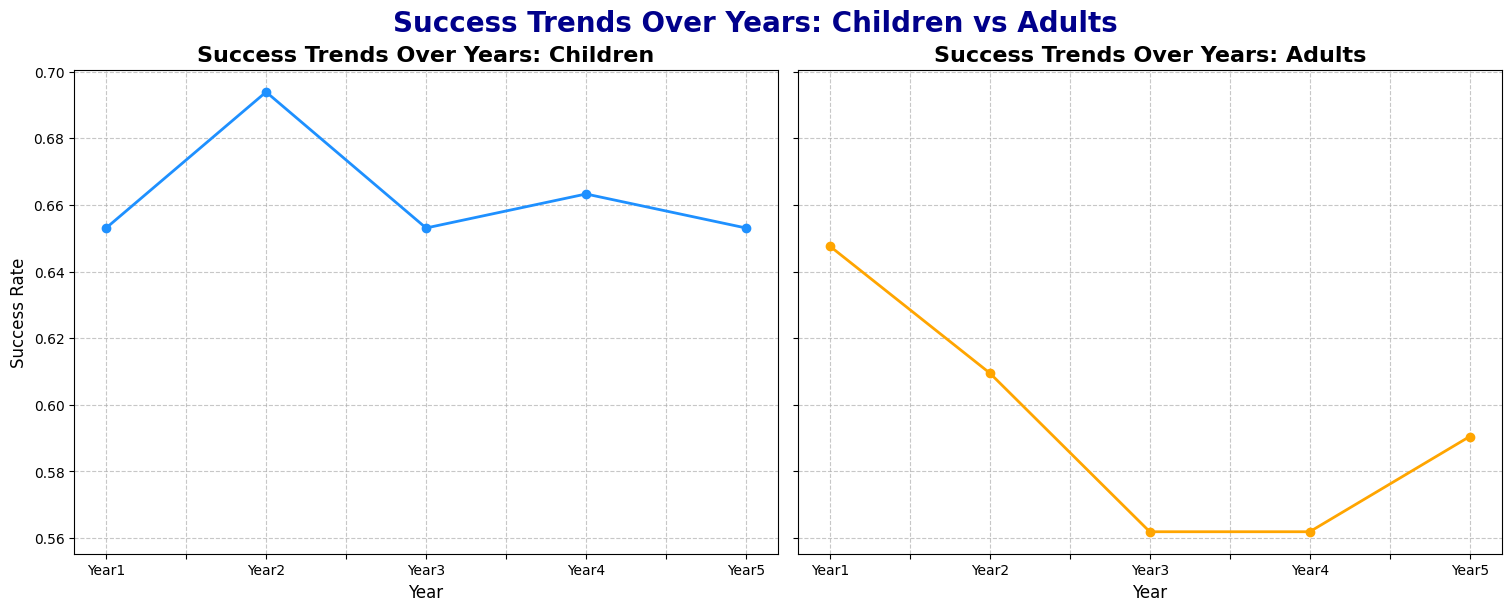

In [21]:
# --- Section 3: Success Trends for Children vs Adults ---
# Explanation: Group participants into Children (<= 15 years) and Adults (> 15 years) and analyze success trends over years.

try:
    # Define a function to categorize age groups
    def categorize_age(binned_age):
        children_categories = ['< 1', '1 to 2', '3-4', '5 to 7', '8-10', '11 to 14']
        if binned_age in children_categories:
            return 'Children'
        elif binned_age in age_order:  # Ensure it's a valid age category
            return 'Adults'
        else:
            return np.nan  # Mark invalid entries as NaN

    # Create a new column for age group
    if 'Binned_Onset_Age' not in data.columns:
        raise ValueError("Column 'Binned_Onset_Age' is missing from the dataset.")
    data['Age_Group'] = data['Binned_Onset_Age'].apply(categorize_age)

    # Filter data to include only rows with complete data for relevant columns
    required_columns = [f"ILAE_Year{year}" for year in range(1, 6)] + ['Age_Group']
    data_filtered = data.dropna(subset=required_columns).copy()

    # Group data by Age_Group and calculate success rates for each year
    age_grouped = data_filtered.groupby('Age_Group')
    success_rates_age_group = {}

    for year in range(1, 6):
        if f"Success_Year{year}" not in data.columns:
            raise ValueError(f"Column 'Success_Year{year}' is missing from the dataset.")
        success_rates_age_group[f"Year{year}"] = age_grouped[f"Success_Year{year}"].mean()

    success_rates_age_group_df = pd.DataFrame(success_rates_age_group)

    # Check for missing or problematic data
    if success_rates_age_group_df.isnull().values.any():
        print("Warning: Some age groups have missing data.")
    if (success_rates_age_group_df == 0).all(axis=1).any():
        print("Warning: Some age groups have zero success rates across all years.")

    # --- Plot success trends for Children and Adults side by side with shared Y-axis ---
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True, constrained_layout=True)

    # Plot Children
    if 'Children' in success_rates_age_group_df.index:
        success_rates_age_group_df.loc['Children'].plot(ax=axes[0], marker='o', linewidth=2, color='dodgerblue')
        axes[0].set_title('Success Trends Over Years: Children', fontsize=16, fontweight='bold')
        axes[0].set_xlabel('Year', fontsize=12)
        axes[0].set_ylabel('Success Rate', fontsize=12)
        axes[0].grid(True, linestyle='--', alpha=0.7)
    else:
        axes[0].text(0.5, 0.5, 'No Data for Children', fontsize=14, ha='center', va='center')
        axes[0].set_title('Success Trends Over Years: Children', fontsize=16, fontweight='bold')

    # Plot Adults
    if 'Adults' in success_rates_age_group_df.index:
        success_rates_age_group_df.loc['Adults'].plot(ax=axes[1], marker='o', linewidth=2, color='orange')
        axes[1].set_title('Success Trends Over Years: Adults', fontsize=16, fontweight='bold')
        axes[1].set_xlabel('Year', fontsize=12)
        axes[1].grid(True, linestyle='--', alpha=0.7)
    else:
        axes[1].text(0.5, 0.5, 'No Data for Adults', fontsize=14, ha='center', va='center')
        axes[1].set_title('Success Trends Over Years: Adults', fontsize=16, fontweight='bold')

    plt.suptitle('Success Trends Over Years: Children vs Adults', fontsize=20, fontweight='bold', color='darkblue')
    plt.show()

except ValueError as ve:
    print(f"ValueError: {ve}")
except KeyError as ke:
    print(f"KeyError: {ke}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Explanation of Results:
# These graphs show the success trends over the years for Children (<= 15 years) and Adults (> 15 years) side by side.
# The shared Y-axis allows for easy comparison of success rates between the two groups.


In [22]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# --- Load the Dataset ---
file_path = 'Metadata_Release_Anon.csv'

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the dataset: {e}")
    exit()

# --- Preprocessing: Define Success Criteria ---
def define_success(ilae_score):
    try:
        return 1 if ilae_score <= 2 else 0
    except Exception as e:
        print(f"Error in define_success: {e}")
        return np.nan

try:
    for year in range(1, 6):
        col_name = f"ILAE_Year{year}"
        success_col = f"Success_Year{year}"
        if col_name in data.columns:
            data[success_col] = data[col_name].apply(define_success)
        else:
            print(f"Warning: Column '{col_name}' not found. Skipping...")
except Exception as e:
    print(f"Error during preprocessing: {e}")
    exit()

# Define age categories and ensure proper ordering
try:
    age_order = ['< 1', '1 to 2', '3-4', '5 to 7', '8-10', '11 to 14', '15 to 19',
                 '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '> 50']
    if 'Binned_Onset_Age' not in data.columns:
        raise ValueError("Column 'Binned_Onset_Age' is missing from the dataset.")
    data['Binned_Onset_Age'] = pd.Categorical(data['Binned_Onset_Age'], categories=age_order, ordered=True)
except ValueError as ve:
    print(f"ValueError: {ve}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during age categorization: {e}")
    exit()

# --- Perform ANOVA ---
anova_results = {}
try:
    for year in range(1, 6):
        samples = []
        for age in age_order:
            if age in data['Binned_Onset_Age'].unique():
                group_data = data[data['Binned_Onset_Age'] == age][f"Success_Year{year}"].dropna()
                if not group_data.empty:
                    samples.append(group_data)
        if len(samples) > 1:  # Ensure there are enough groups for ANOVA
            try:
                anova_results[f"Year {year}"] = f_oneway(*samples)
            except Exception as e:
                print(f"Error running ANOVA for Year {year}: {e}")
                anova_results[f"Year {year}"] = None
        else:
            anova_results[f"Year {year}"] = None
except Exception as e:
    print(f"An unexpected error occurred during ANOVA: {e}")

# --- Display Results ---
try:
    for year, result in anova_results.items():
        if result and hasattr(result, 'pvalue'):
            print(f"{year}: p-value = {result.pvalue:.4f}")
            if result.pvalue < 0.05:
                print(f"   Significant differences found among age groups in {year}.")
            else:
                print(f"   No significant differences found among age groups in {year}.")
        else:
            print(f"{year}: Not enough data for ANOVA or encountered an error.")
except Exception as e:
    print(f"An unexpected error occurred while displaying results: {e}")


Dataset loaded successfully.
Year 1: p-value = 0.4959
   No significant differences found among age groups in Year 1.
Year 2: p-value = 0.0254
   Significant differences found among age groups in Year 2.
Year 3: p-value = 0.1464
   No significant differences found among age groups in Year 3.
Year 4: p-value = 0.2043
   No significant differences found among age groups in Year 4.
Year 5: p-value = 0.1003
   No significant differences found among age groups in Year 5.



Tukey HSD Test Results for Year 2 Success Rates:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
  1 to 2 11 to 14  -0.1656 0.8126 -0.5045 0.1734  False
  1 to 2 15 to 19  -0.2169 0.5086 -0.5539 0.1201  False
  1 to 2 20 to 24  -0.0085    1.0 -0.3601  0.343  False
  1 to 2 25 to 29  -0.0769 0.9991 -0.4854 0.3316  False
  1 to 2 30 to 34  -0.2908 0.3853 -0.7033 0.1218  False
  1 to 2 35 to 39  -0.3462 0.4103 -0.8464 0.1541  False
  1 to 2   5 to 7  -0.0324    1.0 -0.3757 0.3109  False
11 to 14 15 to 19  -0.0513 0.9984 -0.2994 0.1968  False
11 to 14 20 to 24    0.157 0.6277 -0.1106 0.4246  False
11 to 14 25 to 29   0.0886 0.9932 -0.2503 0.4275  False
11 to 14 30 to 34  -0.1252 0.9542  -0.469 0.2186  False
11 to 14 35 to 39  -0.1806 0.9203 -0.6259 0.2647  False
11 to 14   5 to 7   0.1332 0.7604 -0.1234 0.3898  False
15 to 19 20 to 24   0.2083 0.2464 -0.0568 0.4735  Fals

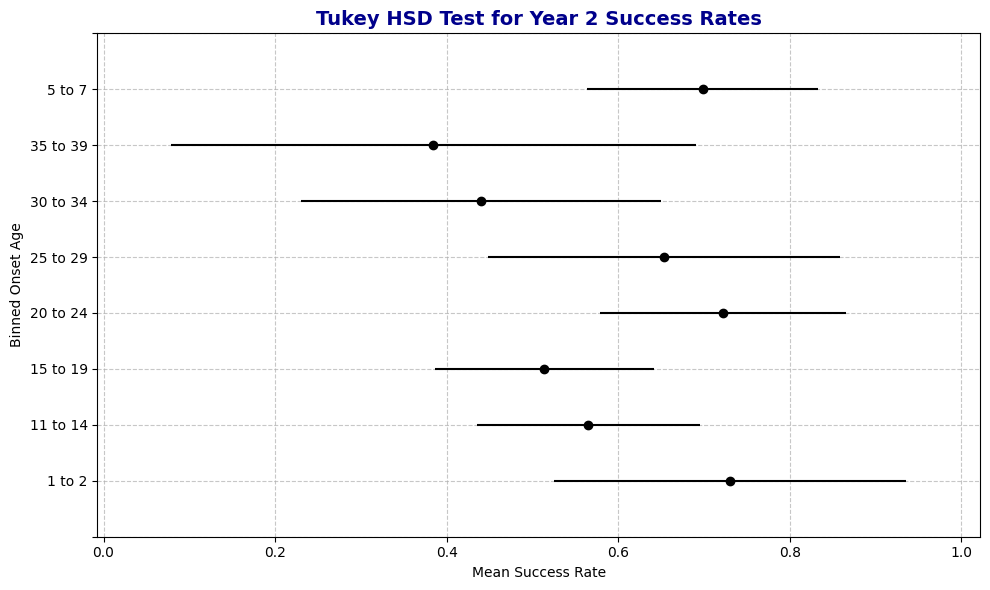

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

try:
    # --- Filter data for Year 2 ---
    if 'Binned_Onset_Age' not in data.columns or 'Success_Year2' not in data.columns:
        raise ValueError("Required columns 'Binned_Onset_Age' or 'Success_Year2' are missing from the dataset.")

    # Filter rows with missing data in relevant columns
    filtered_data = data[['Binned_Onset_Age', 'Success_Year2']].dropna()

    # Check if sufficient groups exist
    unique_groups = filtered_data['Binned_Onset_Age'].unique()
    if len(unique_groups) > 1:
        # Perform Tukey's HSD
        tukey_result = pairwise_tukeyhsd(
            endog=filtered_data['Success_Year2'],  # Dependent variable
            groups=filtered_data['Binned_Onset_Age'],  # Independent variable
            alpha=0.05
        )

        # Display results
        print("\nTukey HSD Test Results for Year 2 Success Rates:")
        print(tukey_result)

        # Plot results
        tukey_result.plot_simultaneous(ylabel='Binned Onset Age', xlabel='Mean Success Rate')
        plt.title('Tukey HSD Test for Year 2 Success Rates', fontsize=14, fontweight='bold', color='darkblue')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough groups for Tukey HSD Test in Year 2.")

except ValueError as ve:
    print(f"ValueError: {ve}")
except KeyError as ke:
    print(f"KeyError: {ke}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
